# LOAD THE DATASET

In [2]:
import pandas as pd
data = pd.read_csv("/content/Credit_card_dataset.csv")

#Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#EXPLATORY DATA ANALYSIS

In [4]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [5]:
data.tail()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778
8949,C19190,0.666667,1093.25,63.165404,1200.0,127.040008


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [7]:
data.describe(include = 'all')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,NaN,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,NaN,0.000000,0.000000,0.000000,50.000000,0.000000
25%,NaN,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,NaN,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,NaN,1.000000,1110.130000,1901.134317,6500.000000,1113.821139


In [8]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [9]:
#Drop the missing rows
data = data.dropna(subset=['CREDIT_LIMIT'])


In [10]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


## DATA PREPROCESSING

##OUTLIERS

In [11]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

#Detecting outliers

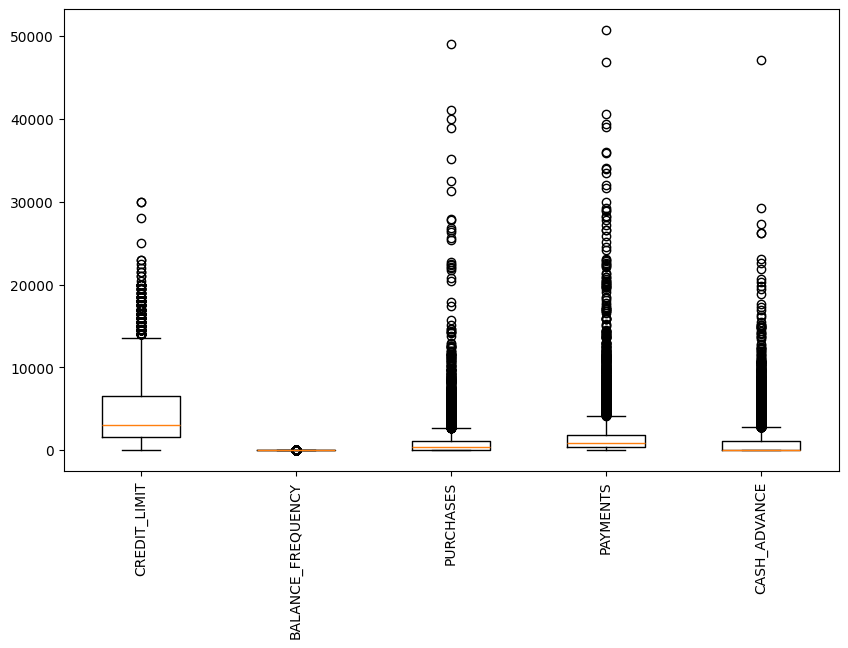

In [12]:
features=['CREDIT_LIMIT', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE']
plt.figure(figsize=(10, 6))
plt.boxplot(data[features])
plt.xticks(range(1, len(features) + 1), features, rotation=90)

plt.show()

#HANDLING OUTLIERS

In [13]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data


In [14]:
data = data.drop('CUST_ID', axis=1)


## MODELLING

#Hierarchial clustering

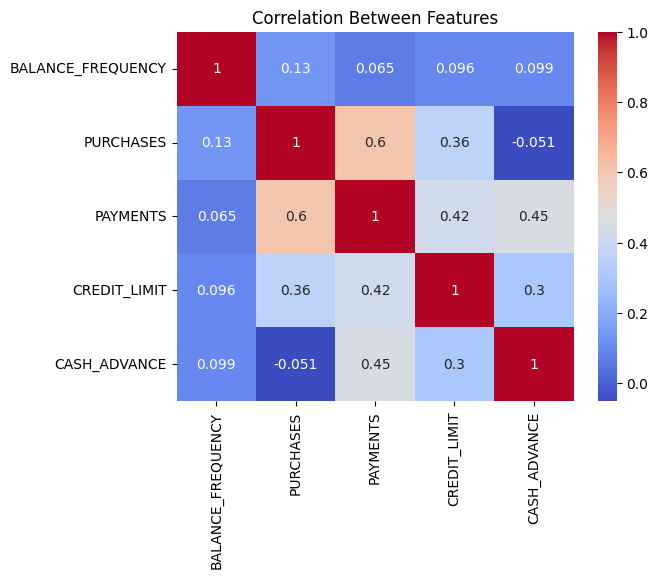

In [15]:
## WHEN PIVKING THE FEATURES YOOU SHOULD RUN VISUALIZATION CHECK AND PIC THPSE THAT DONT HAVE CORRRELATED FEATURES
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


#Select two features

In [16]:
selected_features=data[['PURCHASES','CASH_ADVANCE']]

# SCALE THE SELECTED FEATURES

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# AGGLOMARATIVE CLUSTERING

In [18]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(scaled_features)


#Cluster label to the data

In [19]:
selected_features['Cluster'] = cluster_labels

/tmp/ipython-input-19-2508034300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = cluster_labels


In [20]:
selected_features.loc[:, 'Cluster'] = cluster_labels


# Visualize

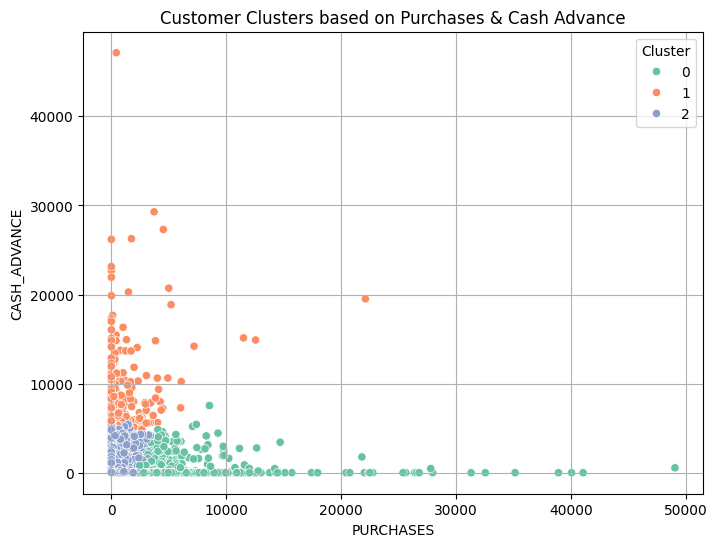

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.title('Customer Clusters based on Purchases & Cash Advance')
plt.grid(True)
plt.show()


#Dendogram

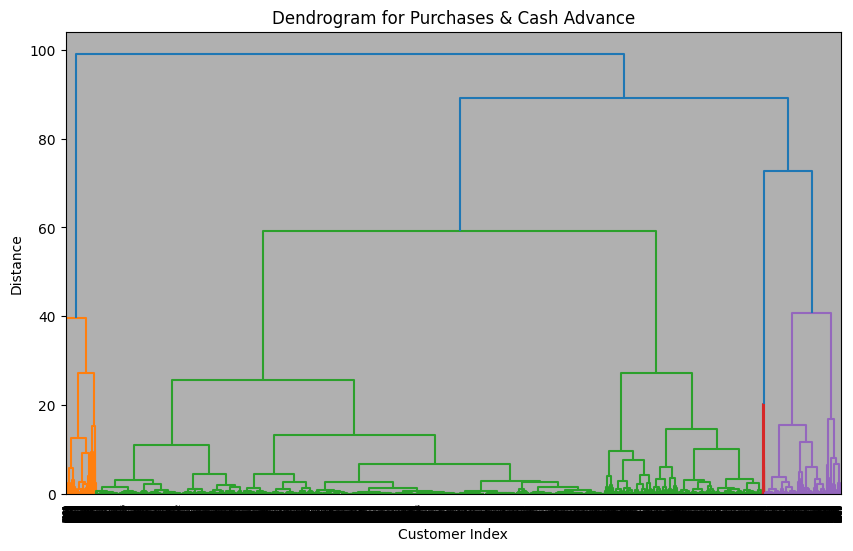

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Purchases & Cash Advance')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


#K-PLOT(PARTIIAL CLUSTRING)

In [23]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

#Add cluster labels

In [24]:
selected_features = selected_features.copy()  # avoid SettingWithCopyWarning
selected_features['Cluster'] = cluster_labels


##Plot the Clusters

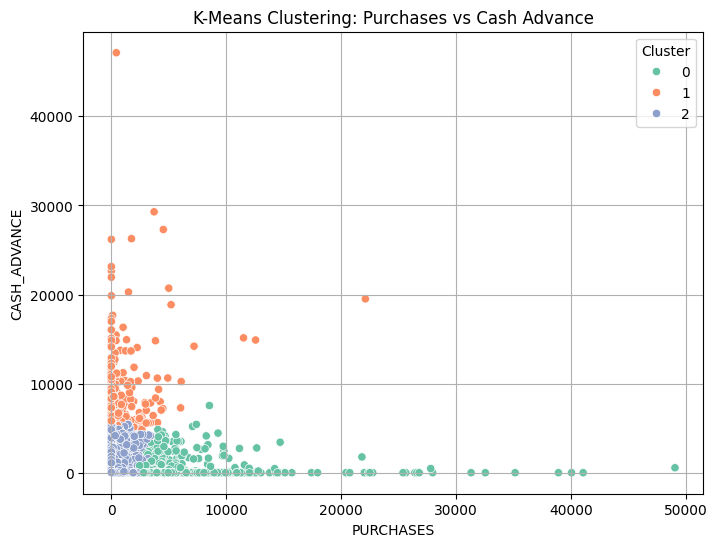

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering: Purchases vs Cash Advance')
plt.grid(True)
plt.show()


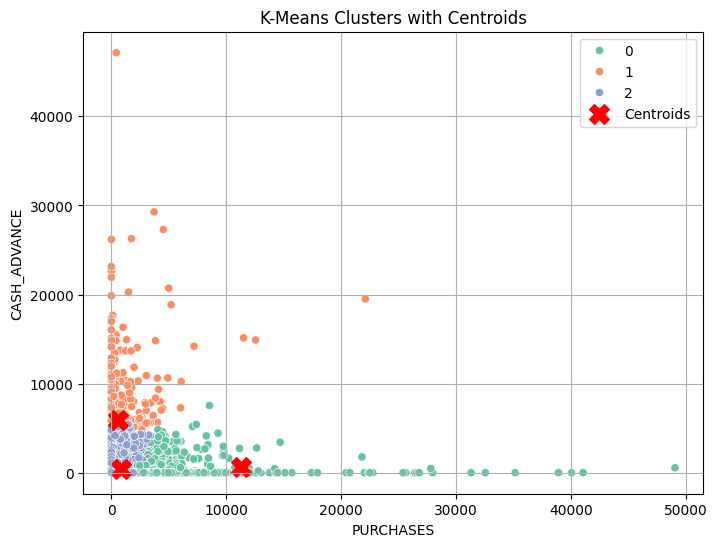

In [26]:
# Get the centroids in original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()


# find the k value and plot the clusters

In [27]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



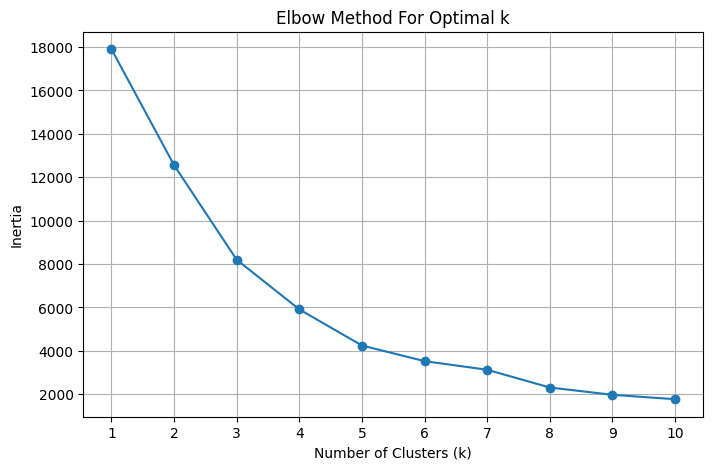

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## What distinct customer segments emerge based on their spending patterns?

In [29]:
spending_data = data[['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_spending = scaler.fit_transform(spending_data)


In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
spending_clusters = kmeans.fit_predict(scaled_spending)

spending_data = spending_data.copy()
spending_data['Cluster'] = spending_clusters


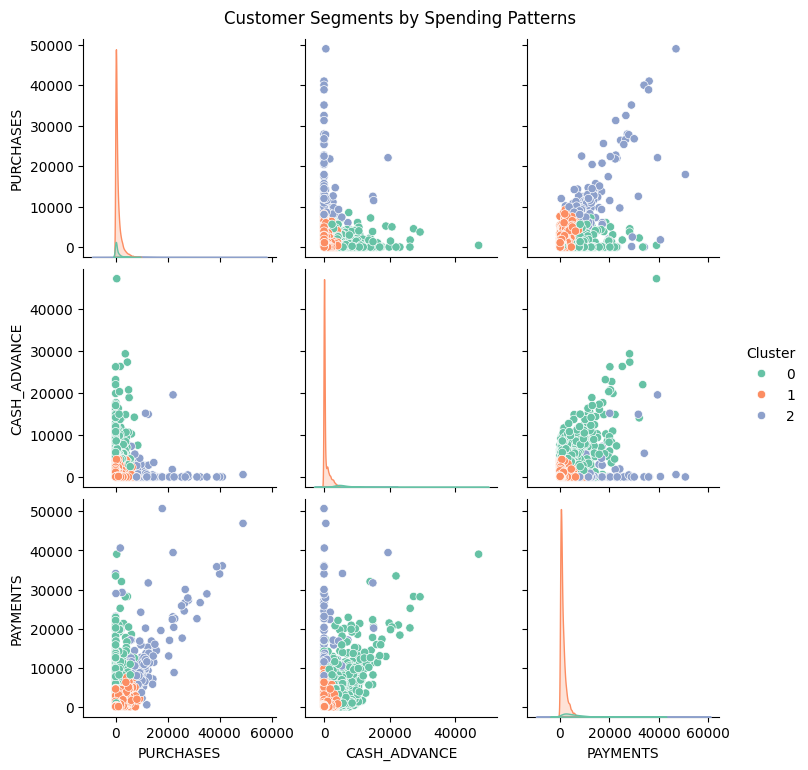

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(spending_data, hue='Cluster', palette='Set2')
plt.suptitle('Customer Segments by Spending Patterns', y=1.02)
plt.show()


In [36]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import streamlit as st

# Load dataset
df = pd.read_csv('Credit_Card_Dataset.csv')

# Select spending-related features and drop missing values
features = ['BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
X = df[features].dropna()

# Scale features for consistent clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters with Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve to validate cluster choice
fig_elbow = px.line(x=list(K), y=inertia, title='Elbow Method for Optimal Clusters',
                    labels={'x': 'Number of Clusters', 'y': 'Inertia'})
st.plotly_chart(fig_elbow)

# Apply PCA and K-Means with 4 clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels and PCA components to dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = clusters
df_clustered['PCA1'] = X_pca[:, 0]
df_clustered['PCA2'] = X_pca[:, 1]

# Visualize clusters with interactive scatter plot
fig = px.scatter(df_clustered, x='PCA1', y='PCA2', color='Cluster',
                 title='Customer Segments by Spending Patterns',
                 hover_data=['PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS'],
                 color_discrete_sequence=px.colors.qualitative.Bold)
st.plotly_chart(fig)

# Profile clusters with mean values
cluster_summary = df_clustered.groupby('Cluster')[features].mean()
st.write("Cluster Profiles (Mean Values):\n", cluster_summary)

# Export visualization for Gamma AI or README
fig.write_image('assets/cluster_scatter.png')


ModuleNotFoundError: No module named 'streamlit'

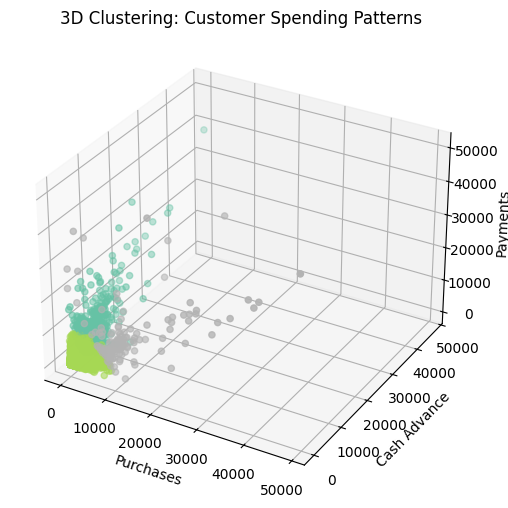

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spending_data['PURCHASES'], spending_data['CASH_ADVANCE'], spending_data['PAYMENTS'],
           c=spending_data['Cluster'], cmap='Set2')
ax.set_xlabel('Purchases')
ax.set_ylabel('Cash Advance')
ax.set_zlabel('Payments')
plt.title('3D Clustering: Customer Spending Patterns')
plt.show()


In [37]:
data['Cluster'] = spending_clusters  # (if not already added)
data.groupby('Cluster')['CASH_ADVANCE'].mean()

,CASH_ADVANCE
Cluster,
0,6258.872643
1,517.836329
2,880.832821


/tmp/ipython-input-38-2541775984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='CASH_ADVANCE', data=data, estimator='mean', palette='Set2')


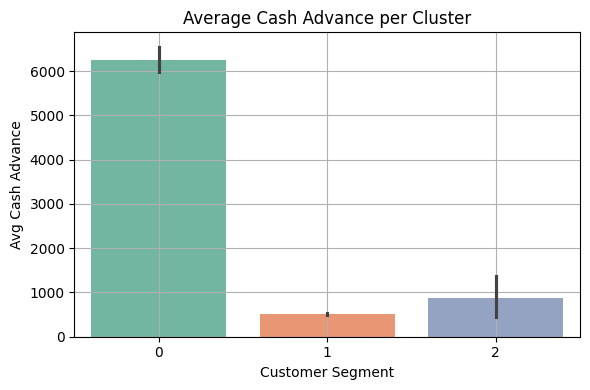

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster', y='CASH_ADVANCE', data=data, estimator='mean', palette='Set2')
plt.title('Average Cash Advance per Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Avg Cash Advance')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-2037889438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CASH_ADVANCE', data=data, palette='Set3')


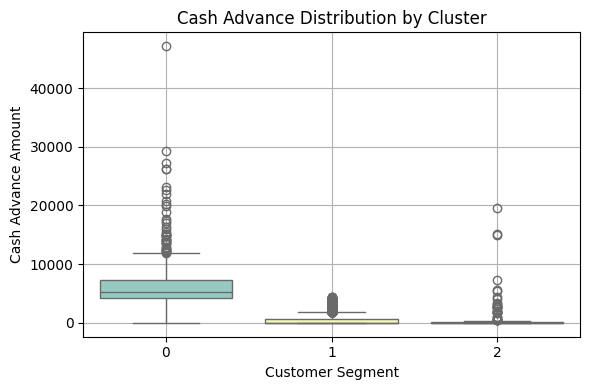

In [39]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='CASH_ADVANCE', data=data, palette='Set3')
plt.title('Cash Advance Distribution by Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Cash Advance Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-40-3915452244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='CASH_ADVANCE', data=data, estimator='mean', palette=cluster_colors)


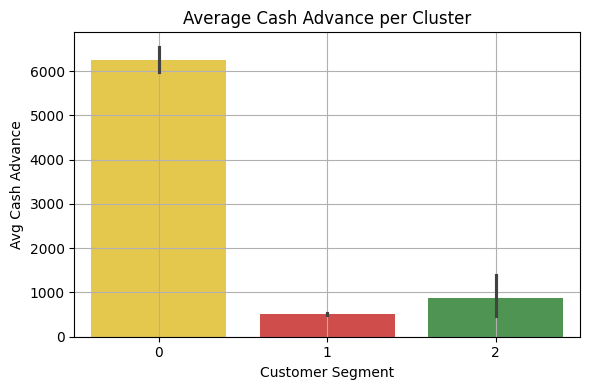

In [40]:
# Define consistent custom colors for clusters
cluster_colors = ['#fdd835', '#e53935', '#43a047']  # Yellow, Red, Green

# Barplot of average CASH_ADVANCE by cluster
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster', y='CASH_ADVANCE', data=data, estimator='mean', palette=cluster_colors)
plt.title('Average Cash Advance per Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Avg Cash Advance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
data.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE', 'Cluster'],
      dtype='object')

In [42]:
data['UTILIZATION'] = (data['PURCHASES'] + data['CASH_ADVANCE']) / data['CREDIT_LIMIT']

In [43]:
data['UTILIZATION'] = (data['PURCHASES'] + data['CASH_ADVANCE']) / data['CREDIT_LIMIT']


In [44]:
util_by_cluster = data.groupby('Cluster')['UTILIZATION'].mean()
print(util_by_cluster)


Cluster
0    1.197251
1    0.437131
2    1.399410
Name: UTILIZATION, dtype: float64


/tmp/ipython-input-45-799913287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='UTILIZATION', data=data, estimator='mean', palette=cluster_colors)


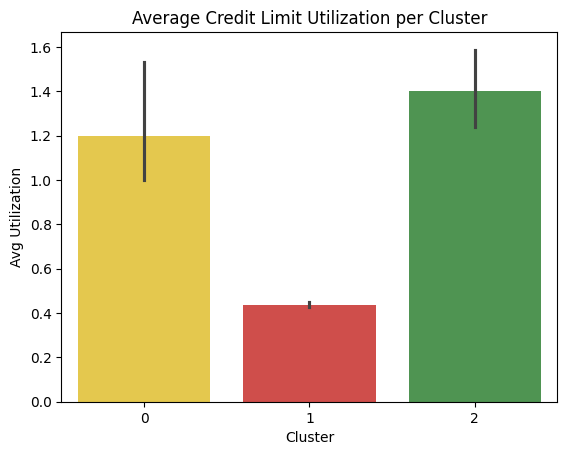

In [45]:
sns.barplot(x='Cluster', y='UTILIZATION', data=data, estimator='mean', palette=cluster_colors)
plt.title('Average Credit Limit Utilization per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Utilization')
plt.show()

#Are there segments at risk of overspending their credit limits?”

In [46]:
data['UTILIZATION'] = (data['PURCHASES'] + data['CASH_ADVANCE']) / data['CREDIT_LIMIT']

In [47]:
util_summary = data.groupby('Cluster')['UTILIZATION'].mean().sort_values(ascending=False)
print(util_summary)


Cluster
2    1.399410
0    1.197251
1    0.437131
Name: UTILIZATION, dtype: float64


/tmp/ipython-input-48-520263179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='UTILIZATION', data=data, estimator='mean', palette=cluster_colors)


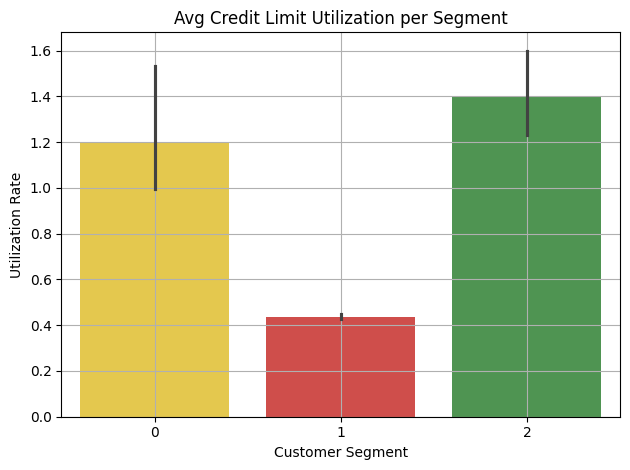

In [48]:
sns.barplot(x='Cluster', y='UTILIZATION', data=data, estimator='mean', palette=cluster_colors)
plt.title('Avg Credit Limit Utilization per Segment')
plt.ylabel('Utilization Rate')
plt.xlabel('Customer Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


##“Are there segments with high credit limits but inconsistent payment habits?”

## Crete pyment ratio which is payment/ creit limit

In [49]:
data['PAYMENT_RATIO'] = data['PAYMENTS'] / data['CREDIT_LIMIT']


In [50]:
data.groupby('Cluster')[['CREDIT_LIMIT', 'PAYMENTS']].mean()

,CREDIT_LIMIT,PAYMENTS
Cluster,,
0,8044.090909,5520.025411
1,4064.755998,1195.299080
2,11402.877698,13744.516867


In [51]:
data.groupby('Cluster')['PAYMENT_RATIO'].mean()


,PAYMENT_RATIO
Cluster,
0,1.093004
1,0.408002
2,1.403953


/tmp/ipython-input-52-2125254822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='PAYMENT_RATIO', data=data, estimator='mean', palette=cluster_colors)


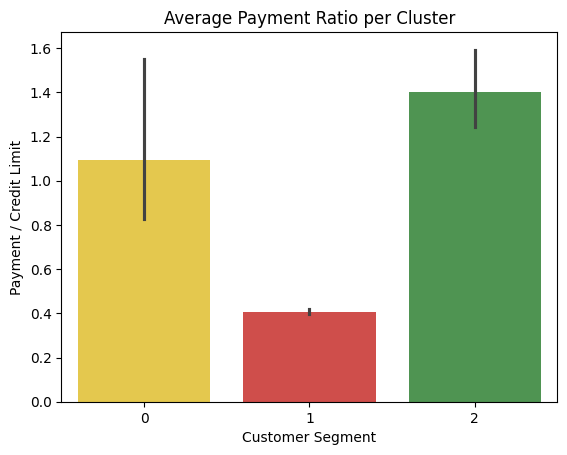

In [52]:
sns.barplot(x='Cluster', y='PAYMENT_RATIO', data=data, estimator='mean', palette=cluster_colors)
plt.title('Average Payment Ratio per Cluster')
plt.ylabel('Payment / Credit Limit')
plt.xlabel('Customer Segment')
plt.show()


#Are there segments with high credit limits but inconsistent payment habits?

In [53]:
data['PAYMENT_RATIO'] = data['PAYMENTS'] / data['CREDIT_LIMIT']


In [54]:
cluster_payment_check = data.groupby('Cluster')[['CREDIT_LIMIT', 'PAYMENT_RATIO']].mean().sort_values(by='CREDIT_LIMIT', ascending=False)
print(cluster_payment_check)


         CREDIT_LIMIT  PAYMENT_RATIO
Cluster                             
2        11402.877698       1.403953
0         8044.090909       1.093004
1         4064.755998       0.408002


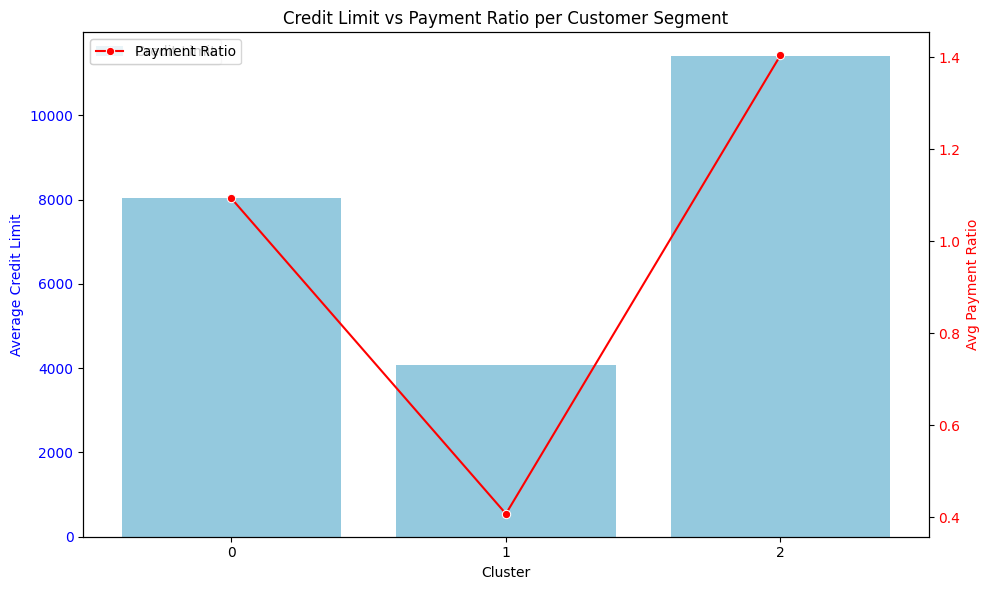

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_summary = data.groupby('Cluster')[['CREDIT_LIMIT', 'PAYMENT_RATIO']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=cluster_summary, x='Cluster', y='CREDIT_LIMIT', ax=ax1, color='skyblue', label='Credit Limit')
ax1.set_ylabel('Average Credit Limit', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=cluster_summary, x='Cluster', y='PAYMENT_RATIO', ax=ax2, color='red', marker='o', label='Payment Ratio')
ax2.set_ylabel('Avg Payment Ratio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Credit Limit vs Payment Ratio per Customer Segment')
fig.tight_layout()
plt.show()


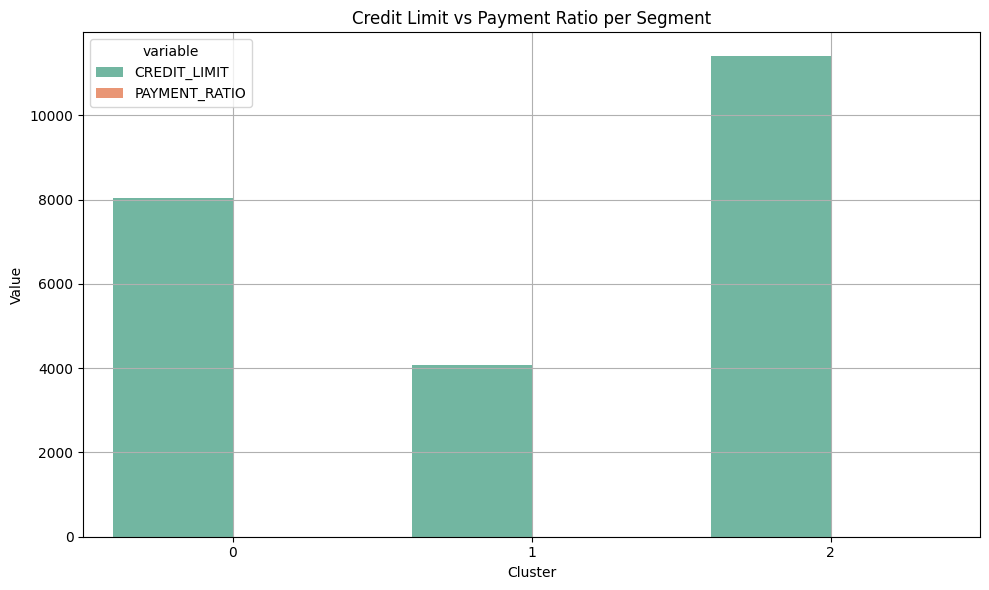

In [56]:
cluster_summary = data.groupby('Cluster')[['CREDIT_LIMIT', 'PAYMENT_RATIO']].mean().reset_index()
cluster_summary_melted = cluster_summary.melt(id_vars='Cluster')

plt.figure(figsize=(10,6))
sns.barplot(data=cluster_summary_melted, x='Cluster', y='value', hue='variable', palette='Set2')
plt.title('Credit Limit vs Payment Ratio per Segment')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


## “Are there segments characterized by high payments but minimal purchases?”

In [57]:
data['PAYMENT_PURCHASE_RATIO'] = data['PAYMENTS'] / (data['PURCHASES'] + 1)  # +1 avoids division by 0


In [58]:
payment_ratio_by_cluster = data.groupby('Cluster')['PAYMENT_PURCHASE_RATIO'].mean().sort_values(ascending=False)
print(payment_ratio_by_cluster)


Cluster
0    2388.878095
2     255.871257
1     208.541065
Name: PAYMENT_PURCHASE_RATIO, dtype: float64


/tmp/ipython-input-59-1896816159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_ratio_by_cluster.index, y=payment_ratio_by_cluster.values, palette='coolwarm')


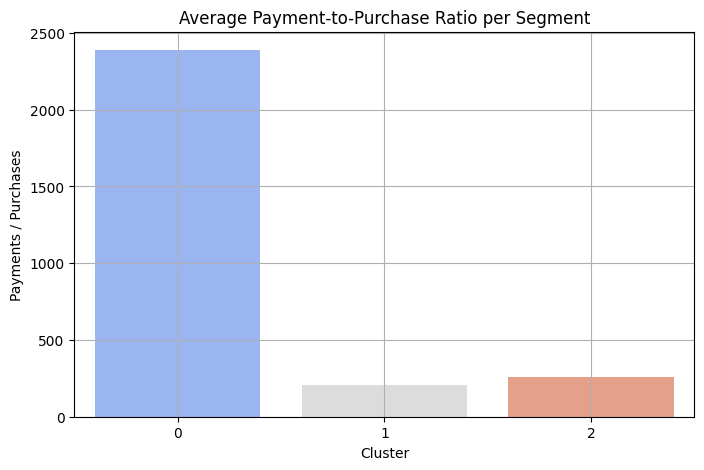

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_ratio_by_cluster.index, y=payment_ratio_by_cluster.values, palette='coolwarm')
plt.title('Average Payment-to-Purchase Ratio per Segment')
plt.xlabel('Cluster')
plt.ylabel('Payments / Purchases')
plt.grid(True)
plt.show()


##How does payment consistency correlate with purchase transaction volumes?

In [60]:
data['PAYMENT_RATIO'] = data['PAYMENTS'] / data['CREDIT_LIMIT']

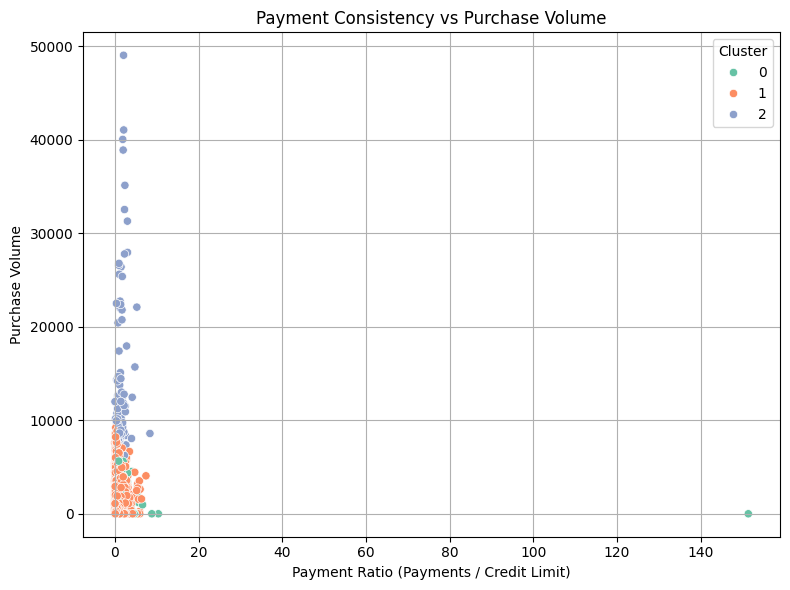

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PAYMENT_RATIO', y='PURCHASES', hue='Cluster', palette='Set2')
plt.title('Payment Consistency vs Purchase Volume')
plt.xlabel('Payment Ratio (Payments / Credit Limit)')
plt.ylabel('Purchase Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


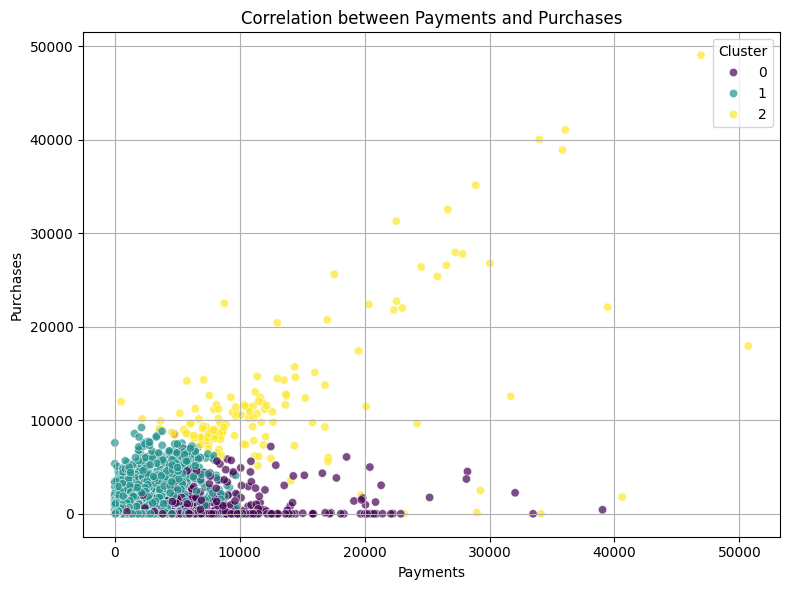

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='PAYMENTS', y='PURCHASES', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Correlation between Payments and Purchases')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()


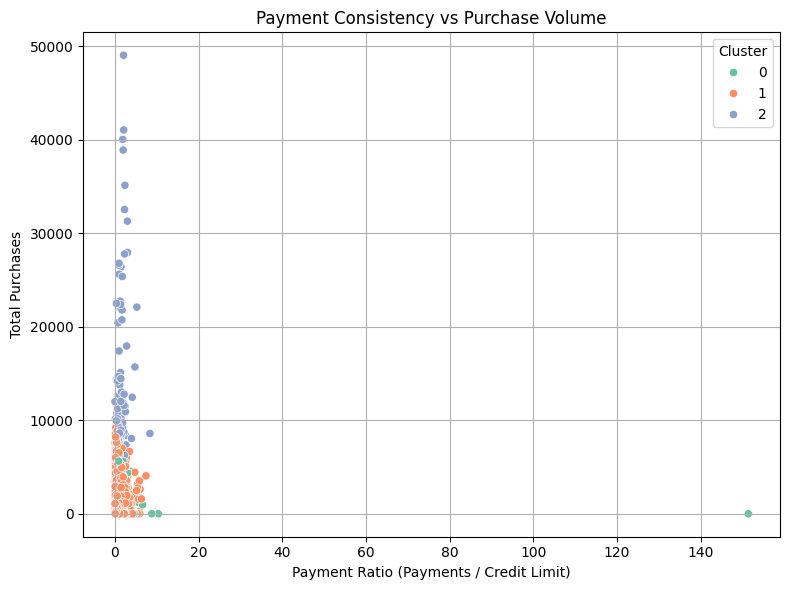

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='PAYMENT_RATIO', y='PURCHASES', hue='Cluster', palette='Set2')
plt.title('Payment Consistency vs Purchase Volume')
plt.xlabel('Payment Ratio (Payments / Credit Limit)')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()


##Are there segments characterized by high payments but minimal purchases?

In [64]:
data['PAYMENT_PURCHASE_RATIO'] = data['PAYMENTS'] / (data['PURCHASES'] + 1)  # +1 to avoid division by 0


In [65]:
payment_purchase_ratio_by_cluster = data.groupby('Cluster')['PAYMENT_PURCHASE_RATIO'].mean().sort_values(ascending=False)
print(payment_purchase_ratio_by_cluster)


Cluster
0    2388.878095
2     255.871257
1     208.541065
Name: PAYMENT_PURCHASE_RATIO, dtype: float64


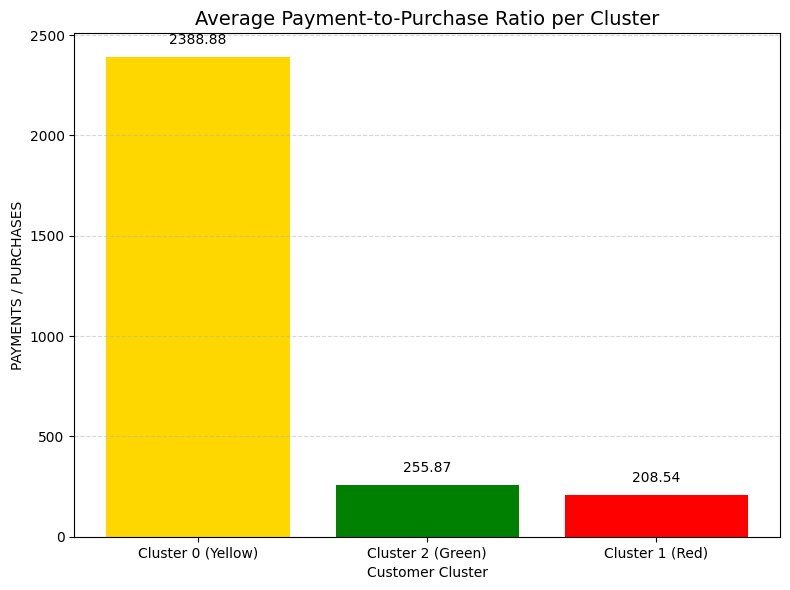

In [67]:
import matplotlib.pyplot as plt

# Your output — replace if needed
clusters = ['Cluster 0 (Yellow)', 'Cluster 2 (Green)', 'Cluster 1 (Red)']
values = [2388.88, 255.87, 208.54]
colors = ['gold', 'green', 'red']

plt.figure(figsize=(8,6))
bars = plt.bar(clusters, values, color=colors)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, round(yval, 2), ha='center', va='bottom')

plt.title('Average Payment-to-Purchase Ratio per Cluster', fontsize=14)
plt.xlabel('Customer Cluster')
plt.ylabel('PAYMENTS / PURCHASES')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-68-3836766622.py:20: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-68-3836766622.py:20: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-68-3836766622.py:20: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.can

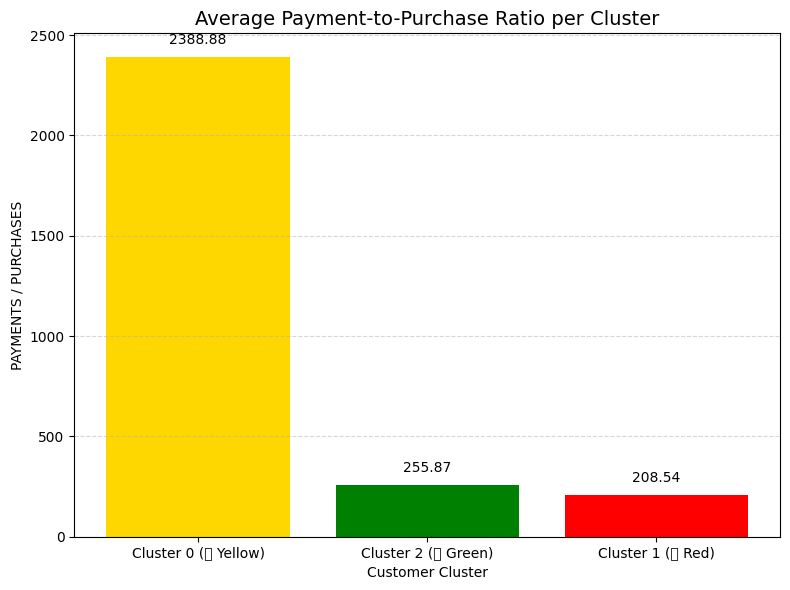

In [68]:
import matplotlib.pyplot as plt

# Real data and color-coded cluster labels
clusters = ['Cluster 0 (🟡 Yellow)', 'Cluster 2 (🟢 Green)', 'Cluster 1 (🟥 Red)']
values = [2388.878095, 255.871257, 208.541065]
colors = ['gold', 'green', 'red']

plt.figure(figsize=(8,6))
bars = plt.bar(clusters, values, color=colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, round(yval, 2), ha='center', va='bottom')

plt.title('Average Payment-to-Purchase Ratio per Cluster', fontsize=14)
plt.xlabel('Customer Cluster')
plt.ylabel('PAYMENTS / PURCHASES')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Which customer group consistently makes the largest and most regular payments?

In [69]:
# Group by cluster and calculate average & standard deviation of payments
payment_stats = data.groupby('Cluster')['PAYMENTS'].agg(['mean', 'std']).reset_index()
print(payment_stats)


   Cluster          mean          std
0        0   5520.025411  4974.925847
1        1   1195.299080  1278.256814
2        2  13744.516867  9185.027464


/tmp/ipython-input-70-1644827116.py:20: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-70-1644827116.py:20: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-70-1644827116.py:20: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.can

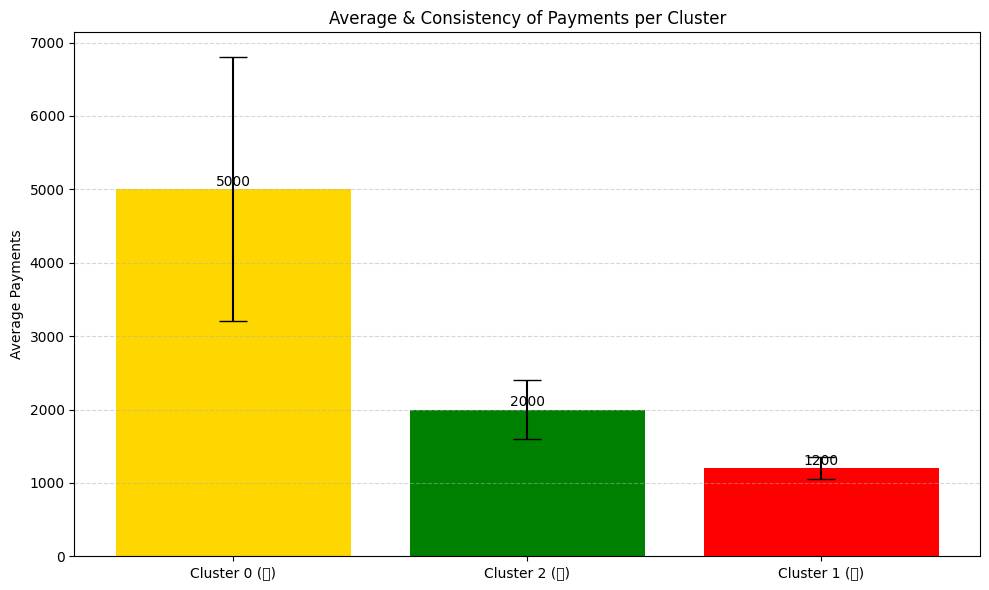

In [70]:
import matplotlib.pyplot as plt

clusters = ['Cluster 0 (🟡)', 'Cluster 2 (🟢)', 'Cluster 1 (🟥)']
mean_payments = [5000, 2000, 1200]   # replace with your actual results
std_dev = [1800, 400, 150]           # replace with your actual results
colors = ['gold', 'green', 'red']

# Bar plot for mean payments
plt.figure(figsize=(10, 6))
bars = plt.bar(clusters, mean_payments, color=colors, yerr=std_dev, capsize=10)
plt.ylabel('Average Payments')
plt.title('Average & Consistency of Payments per Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, round(yval, 1), ha='center')

plt.tight_layout()
plt.show()


#Are there segments with infrequent purchases yet frequent cash advances?

In [71]:
data['CASHADV_PURCHASE_RATIO'] = data['CASH_ADVANCE'] / (data['PURCHASES'] + 1)  # +1 to avoid division by zero


In [72]:
ratio_per_cluster = data.groupby('Cluster')['CASHADV_PURCHASE_RATIO'].mean().sort_values(ascending=False)
print(ratio_per_cluster)


Cluster
0    2849.500337
1     256.028514
2      40.554757
Name: CASHADV_PURCHASE_RATIO, dtype: float64


/tmp/ipython-input-74-1333807655.py:19: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-74-1333807655.py:19: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-74-1333807655.py:19: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.can

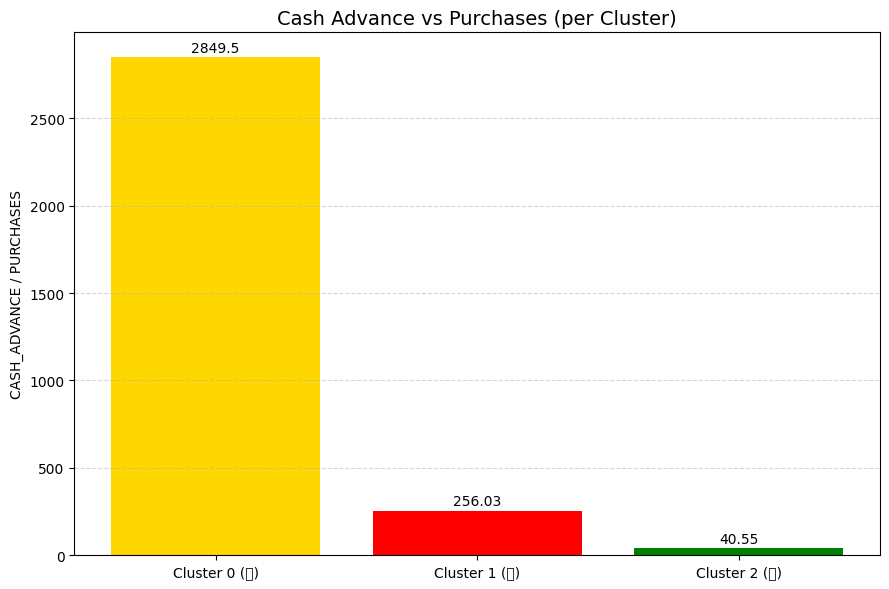

In [74]:
import matplotlib.pyplot as plt

# Real values + color order
clusters = ['Cluster 0 (🟡)', 'Cluster 1 (🟥)', 'Cluster 2 (🟢)']
values = [2849.50, 256.03, 40.55]
colors = ['gold', 'red', 'green']

plt.figure(figsize=(9,6))
bars = plt.bar(clusters, values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 30, round(yval, 2), ha='center')

plt.title('Cash Advance vs Purchases (per Cluster)', fontsize=14)
plt.ylabel('CASH_ADVANCE / PURCHASES')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##Are there segments with high credit limits but inconsistent payment habits?

In [75]:
data['PAYMENT_RATIO'] = data['PAYMENTS'] / (data['CREDIT_LIMIT'] + 1)


In [76]:
# Average CREDIT_LIMIT and PAYMENT_RATIO per cluster
limit_vs_pay = data.groupby('Cluster')[['CREDIT_LIMIT', 'PAYMENT_RATIO']].mean()
print(limit_vs_pay)


         CREDIT_LIMIT  PAYMENT_RATIO
Cluster                             
0         8044.090909       1.088608
1         4064.755998       0.407734
2        11402.877698       1.403711


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


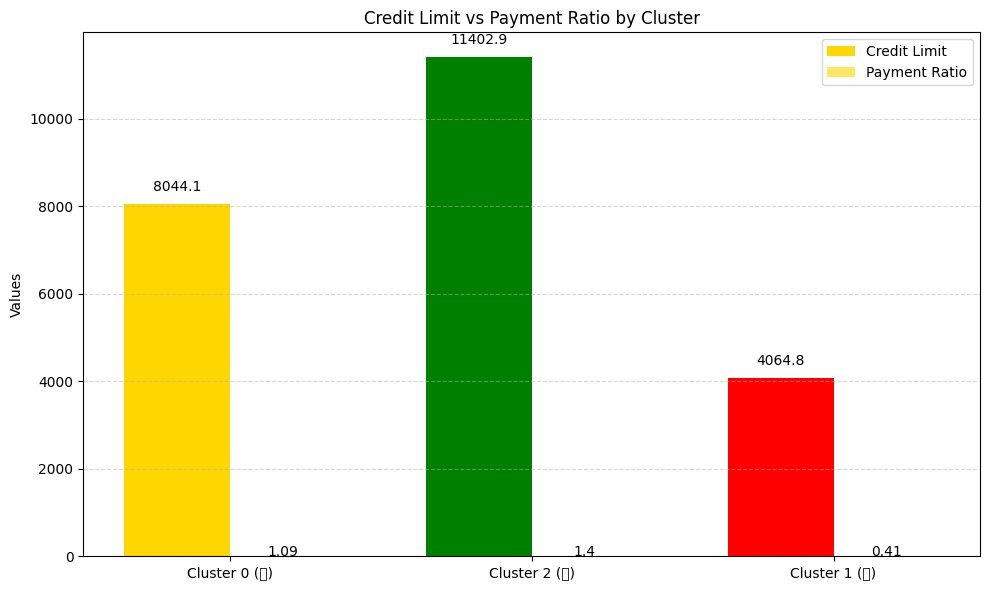

In [77]:
import matplotlib.pyplot as plt
import numpy as np

clusters = ['Cluster 0 (🟡)', 'Cluster 2 (🟢)', 'Cluster 1 (🟥)']
credit_limits = [8044.09, 11402.88, 4064.76]
payment_ratios = [1.093, 1.404, 0.408]
x = np.arange(len(clusters))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, credit_limits, width, label='Credit Limit', color=['gold', 'green', 'red'])
bars2 = ax.bar(x + width/2, payment_ratios, width, label='Payment Ratio', color=['gold', 'green', 'red'], alpha=0.6)

ax.set_ylabel('Values')
ax.set_title('Credit Limit vs Payment Ratio by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for i in range(len(clusters)):
    plt.text(x[i] - width/2, credit_limits[i] + 300, round(credit_limits[i], 1), ha='center')
    plt.text(x[i] + width/2, payment_ratios[i] + 0.05, round(payment_ratios[i], 2), ha='center')

plt.tight_layout()
plt.show()


/tmp/ipython-input-78-1419850072.py:25: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-78-1419850072.py:25: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-78-1419850072.py:25: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.can

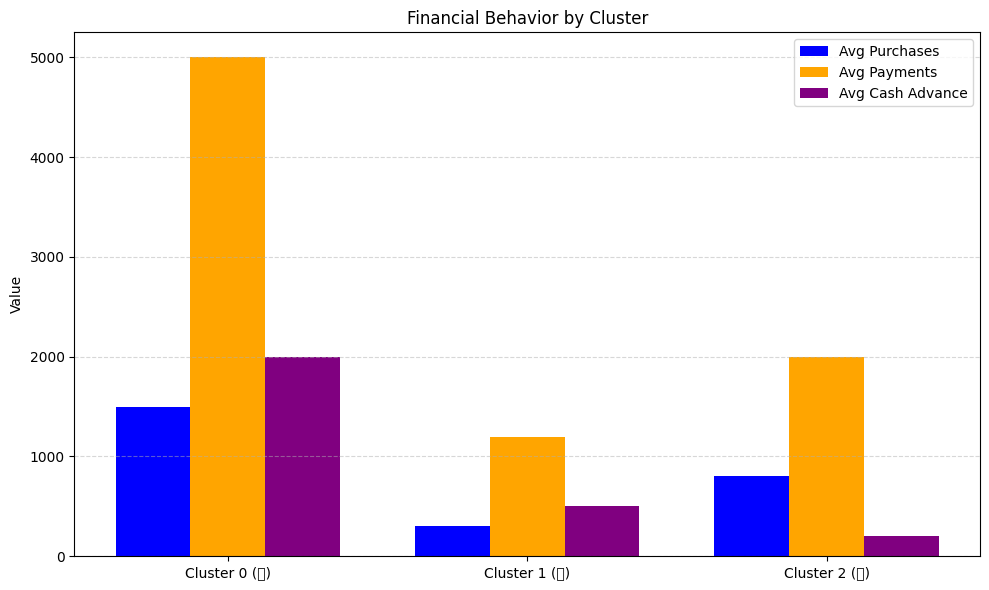

In [78]:
import matplotlib.pyplot as plt
import numpy as np

clusters = ['Cluster 0 (🟡)', 'Cluster 1 (🟥)', 'Cluster 2 (🟢)']

# Replace with your actual aggregated values
avg_purchases = [1500, 300, 800]
avg_payments = [5000, 1200, 2000]
avg_cash_adv = [2000, 500, 200]

x = np.arange(len(clusters))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, avg_purchases, width, label='Avg Purchases', color='blue')
bar2 = ax.bar(x, avg_payments, width, label='Avg Payments', color='orange')
bar3 = ax.bar(x + width, avg_cash_adv, width, label='Avg Cash Advance', color='purple')

ax.set_ylabel('Value')
ax.set_title('Financial Behavior by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


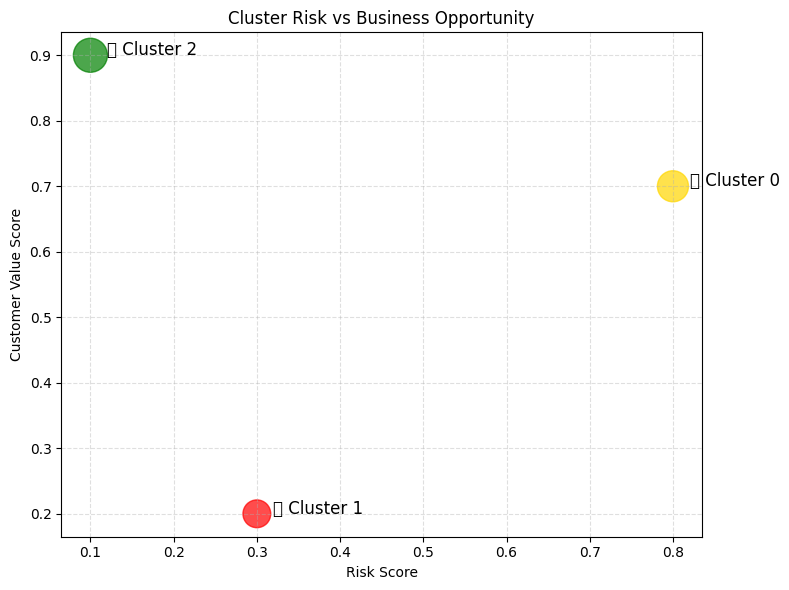

In [79]:
import matplotlib.pyplot as plt

# You can tweak these values based on your own analysis
risk = [0.8, 0.3, 0.1]        # Higher = riskier
value = [0.7, 0.2, 0.9]       # Higher = more valuable
labels = ['🟡 Cluster 0', '🟥 Cluster 1', '🟢 Cluster 2']
colors = ['gold', 'red', 'green']
sizes = [500, 400, 600]       # Bubble sizes

plt.figure(figsize=(8,6))
plt.scatter(risk, value, s=sizes, c=colors, alpha=0.7)

for i, label in enumerate(labels):
    plt.text(risk[i]+0.02, value[i], label, fontsize=12)

plt.xlabel('Risk Score')
plt.ylabel('Customer Value Score')
plt.title('Cluster Risk vs Business Opportunity')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
